<a href="https://colab.research.google.com/github/mosdrsv/Dataset/blob/main/heart_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fgg


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Gender (Male)               0
Age                         0
Education                 105
Current Smoker              0
Cigs/Day                   29
BP Meds                    53
Prevalent Stroke            0
Prevalent Hypertension      0
Diabetes                    0
Total Cholesterol          50
Systolic BP                 0
Diastolic BP                0
BMI                        19
Heart Rate                  1
Glucose                   388
Ten Year CHD                0
dtype: int64
(4240, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 1 to 4240
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender (Male)           4240 non-null   int64  
 1   Age                     4240 non-null   int64  
 2   Education               4135 non-null   f

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(4240, 16)


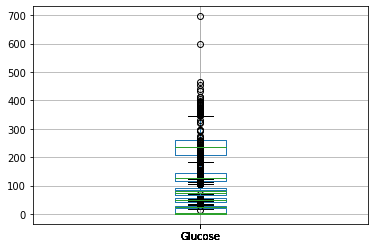

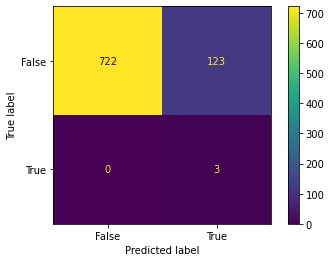

Train accuracy for LogisticRegression : 0.8481721698113207
Test accuracy for LogisticRegression : 0.8549528301886793
Feature: 0, Score: 0.12054
Feature: 1, Score: 0.02615
Feature: 2, Score: -0.34151
Feature: 3, Score: -0.06296
Feature: 4, Score: 0.02037
Feature: 5, Score: 0.04113
Feature: 6, Score: 0.01875
Feature: 7, Score: 0.28274
Feature: 8, Score: 0.04191
Feature: 9, Score: -0.00214
Feature: 10, Score: 0.01900
Feature: 11, Score: -0.02343
Feature: 12, Score: -0.04342
Feature: 13, Score: -0.02599
Feature: 14, Score: 0.00481


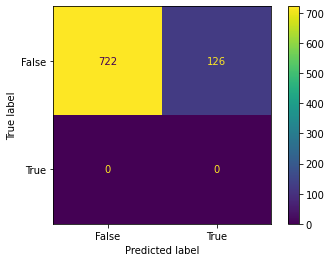

Train accuracy for decision tree (Modle C): 0.8481721698113207
Test accuracy for decision tree (Modle C):  0.8514150943396226


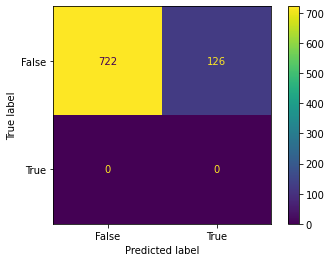

Train accuracy for GradientBoostingClassifier: 0.8487617924528302
Test accuracy for GradientBoostingClassifier  0.8514150943396226


In [ ]:

import numpy as np
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import metrics

from matplotlib import pyplot as plt

import statsmodels.formula.api as sm
from google.colab import drive
 
# Mount Google Drive
drive.mount("/content/gdrive")
 
# Load data from CSV file
df = pd.read_csv("/content/gdrive/My Drive/Sasa_Data/framingham.csv", na_values='?', header=None)

# Set column names
df.columns = ['Gender (Male)', 'Age', 'Education', 'Current Smoker', 'Cigs/Day', 'BP Meds', 'Prevalent Stroke',
              'Prevalent Hypertension', 'Diabetes', 'Total Cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI',
              'Heart Rate', 'Glucose', 'Ten Year CHD']

# Drop first row
df.drop(df.index[0], inplace=True)

# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Check for missing values
print(df.isnull().sum())

# Get shape and info of dataframe
print(df.shape)
print(df.info())

# Impute missing values with mean
imputer = SimpleImputer(missing_values=np.nan, strategy="mean", fill_value=None, verbose=0, copy=True)
imputer = imputer.fit(df)
imdf = imputer.transform(df)

# Convert array back to dataframe
imdf = pd.DataFrame(imdf)

# Set column names
imdf.columns = ['Gender (Male)', 'Age', 'Education', 'Current Smoker', 'Cigs/Day', 'BP Meds', 'Prevalent Stroke',
                'Prevalent Hypertension', 'Diabetes', 'Total Cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI',
                'Heart Rate', 'Glucose', 'Ten Year CHD']

# Check for missing values
print(imdf.isnull().sum())

# Get mean of each column
print(imdf.mean())
imdf.isnull().sum()
imdf.mean()
# Plot boxplot for Cigs/Day column and replace outliers with mean
imdf.boxplot(column='Cigs/Day')
imdf.loc[imdf['Cigs/Day'] > 59, 'Cigs/Day'] = 9.02

# Plot boxplot for Education column
imdf.boxplot(column='Education')

# Plot boxplot for Age column
imdf.boxplot(column='Age')

# Plot boxplot for Total Cholesterol column and replace outliers with mean
imdf.boxplot(column='Total Cholesterol')
imdf.loc[imdf['Total Cholesterol'] > 480, 'Total Cholesterol'] = 237

# Plot boxplot for Systolic BP column and replace outliers with mean
imdf.boxplot(column='Systolic BP')
imdf.loc[imdf['Systolic BP'] > 270, 'Systolic BP'] = 132

# Plot boxplot for Diastolic BP column
imdf.boxplot(column='Diastolic BP')

# Plot boxplot for BMI column and replace outliers with mean
imdf.boxplot(column='BMI')
imdf.loc[imdf['BMI'] > 49, 'BMI'] = 26

# Plot boxplot for Heart Rate column
imdf.boxplot(column='Heart Rate')

# Plot boxplot for Glucose column
imdf.boxplot(column='Glucose')

#imdf.drop(['Education'],axis=1)

# Split data into features and target
X = imdf.drop(['Ten Year CHD'], axis=1)
y = imdf['Ten Year CHD']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Fit logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
# Get train and test accuracy scores
y_train_pred = classifier.predict(X_train)
train_accuracy = accuracy_score(y_train_pred, y_train)

y_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test_pred, y_test)
print(imdf.shape)


# function for confusion matrix for test data
def confusionmatrix(actual, predicted):
    confusion_matrix = metrics.confusion_matrix(actual, predicted)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

    cm_display.plot()
    plt.show()

#  plot confusion matrix
confusionmatrix(y_test_pred, y_test)

# Print scores
print("Train accuracy for LogisticRegression :", train_accuracy)
print("Test accuracy for LogisticRegression :", test_accuracy)



# Fit decision tree
classifier = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
classifier.fit(X_train, y_train)

# Get train and test accuracy scores
y1_train_pred = classifier.predict(X_train)
train_accuracy = accuracy_score(y_train_pred, y_train)

y_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test_pred, y_test)

#  plot confusion matrix
confusionmatrix(y_test_pred, y_test)

# Print scores
print("Train accuracy for decision tree :", train_accuracy)
print("Test accuracy for decision tree : ", test_accuracy)

classifier = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2,
                                    random_state=0)
classifier.fit(X_train, y_train)

# Get train and test accuracy scores
y_train_pred = classifier.predict(X_train)
train_accuracy = accuracy_score(y_train_pred, y_train)

y_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test_pred, y_test)

#  plot confusion matrix
confusionmatrix(y_test_pred, y_test)

# Print scores
print("Train accuracy for GradientBoostingClassifier:", train_accuracy)
print("Test accuracy for GradientBoostingClassifier ", test_accuracy)